In [1]:
from importlib import reload
import json
import re

import cufflinks as cf
cf.go_offline()

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import SVG, display_html

%cd /root/rolling-pin/python
from rolling_pin import tools, utils, blob_etl, repo_etl, radon_etl
from rolling_pin.blob_etl import BlobETL
from rolling_pin.repo_etl import RepoETL
from rolling_pin.radon_etl import RadonETL
reload(tools)
reload(utils)
reload(blob_etl)
reload(repo_etl)
reload(radon_etl)

COLORS = [
    'henanigans_cyan2',
    'henanigans_red2',
    'henanigans_orange2',
    'henanigans_green2',
    'henanigans_blue2',
    'henanigans_purple2',
    'henanigans_yellow2',
    'henanigans_cyan1',
    'henanigans_red1',
    'henanigans_orange1',
]

pd.set_option('display.max_colwidth', 500)

/root/rolling-pin/python


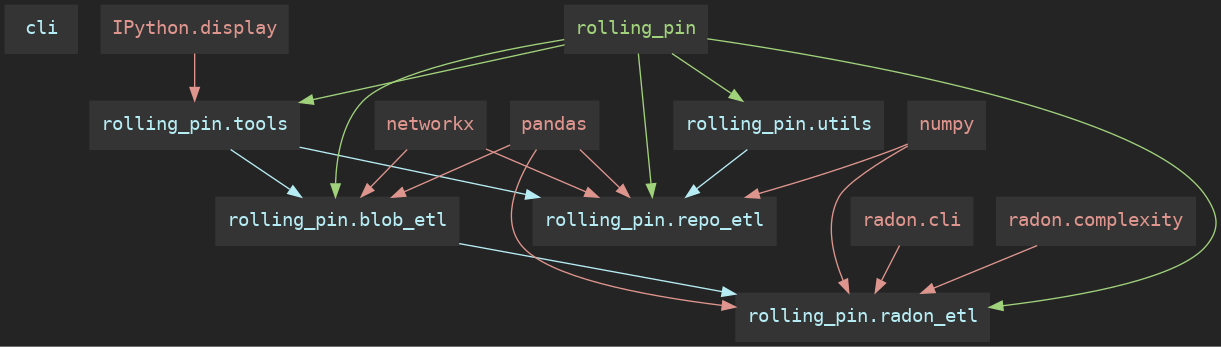

In [13]:
source = '/root/rolling-pin/python'
# d = RepoETL(source, exclude_regex='__init__')
d = RepoETL(source)
d.to_html(as_png=True)

In [14]:
d.to_dataframe()

,node_name,node_type,x,y,dependencies,subpackages,fullpath
0,cli,module,2.5,2,[],[],/root/rolling-pin/python/cli.py
1,rolling_pin.blob_etl,module,1.5,0,"[pandas, networkx, rolling_pin.tools, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/blob_etl.py
2,rolling_pin.radon_etl,module,3.5,0,"[numpy, pandas, radon.complexity, radon.cli, rolling_pin.blob_etl, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/radon_etl.py
3,rolling_pin.repo_etl,module,2.5,0,"[numpy, pandas, networkx, rolling_pin.tools, rolling_pin.utils, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/repo_etl.py
4,rolling_pin.tools,module,0.5,0,"[IPython.display, rolling_pin]",[rolling_pin],/root/rolling-pin/python/rolling_pin/tools.py
5,rolling_pin.utils,module,4.5,0,[rolling_pin],[rolling_pin],/root/rolling-pin/python/rolling_pin/utils.py
6,IPython.display,library,0.0,4,[],[],NaN
7,rolling_pin,subpackage,2.5,3,[],[],NaN
8,networkx,library,1.0,4,[],[],NaN
9,numpy,library,2.0,4,[],[],NaN


In [10]:
x = '{"shape": {"rows": 1, "columns": 1, "format": "SBS96"}, "op": "liquid_handle", "locations": [{"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top", "offset": "1:millimeter"}}}}, {"volume": "-5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-5:microliter", "pump_override_volume": "-5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "5:microliter", "pump_override_volume": "5:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "-2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer-Solvent Source/0"}, {"transports": [{"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "2:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"mode_params": {"tip_position": {"position_z": {"detection": {"method": "capacitance"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "-3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"volume": "3.21:microliter", "mode_params": {"tip_position": {"position_z": {"detection": {"method": "tracked"}, "reference": "liquid_surface", "offset": "-1:millimeter"}}}}, {"mode_params": {"tip_position": {"position_z": {"reference": "well_top"}}}}, {"volume": "5:microliter", "mode_params": {"liquid_class": "air", "tip_position": {"position_z": {"reference": "preceding_position"}}}}], "location": "Inducer Reservoir/2"}], "mode": "air_displacement"}'
x = json.loads(x)

leafs = ['liquid_class', 'reference', 'volume', 'method', 'offset']
for leaf in leafs:
    b = BlobETL(x)
    b = b.filter(lambda x: re.search('0>/transports', x))
    b = b.filter(lambda x: re.search(leaf, x))
    html = b.to_html(layout='dot')
    display_html(html)

In [2]:
src = '/root/rolling-pin/python'
repo = RadonETL(src)
data = repo.data
params = dict(
    theme='henanigans',
    colors=COLORS,
    dimensions=(900, 900),
)

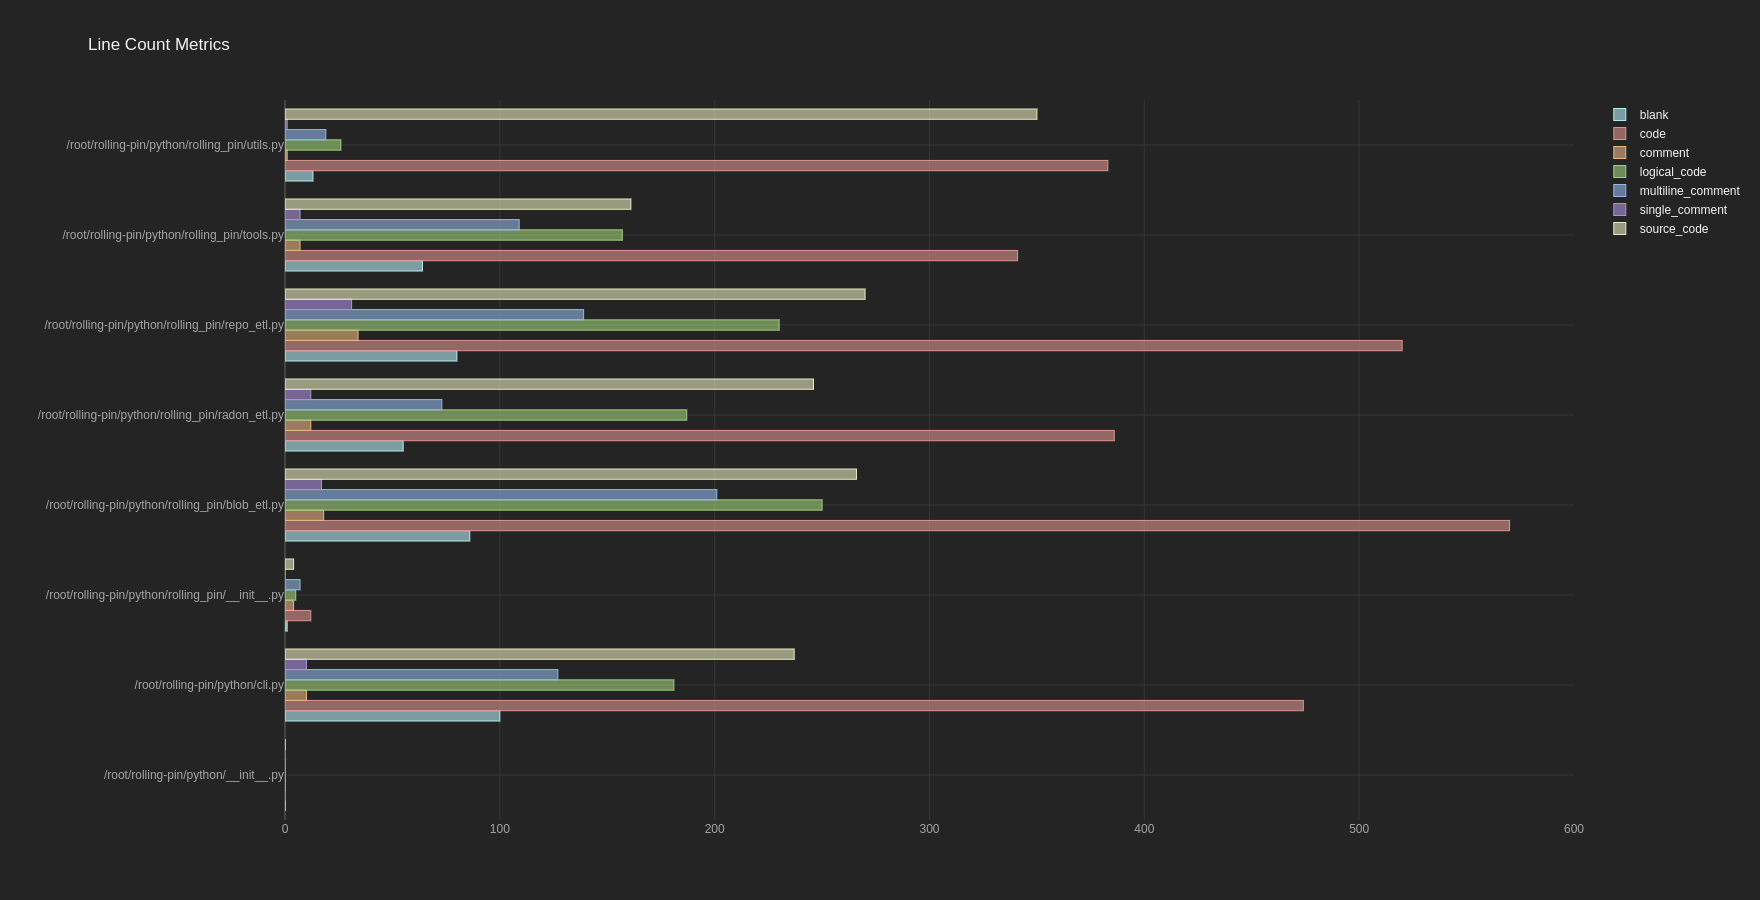

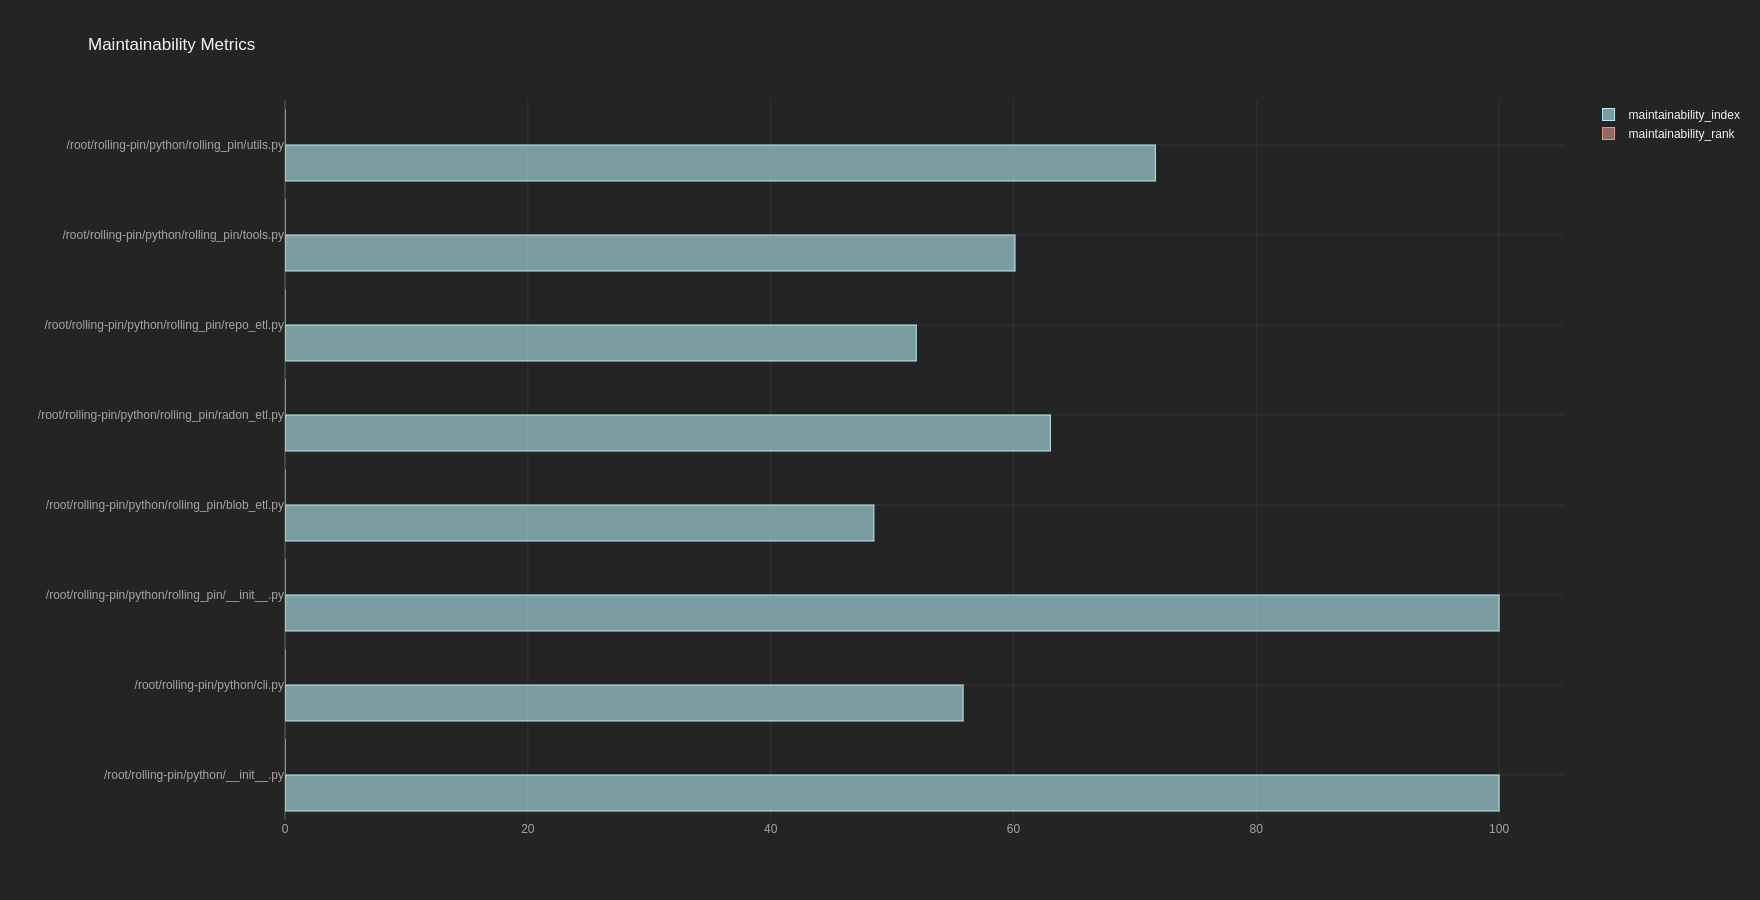

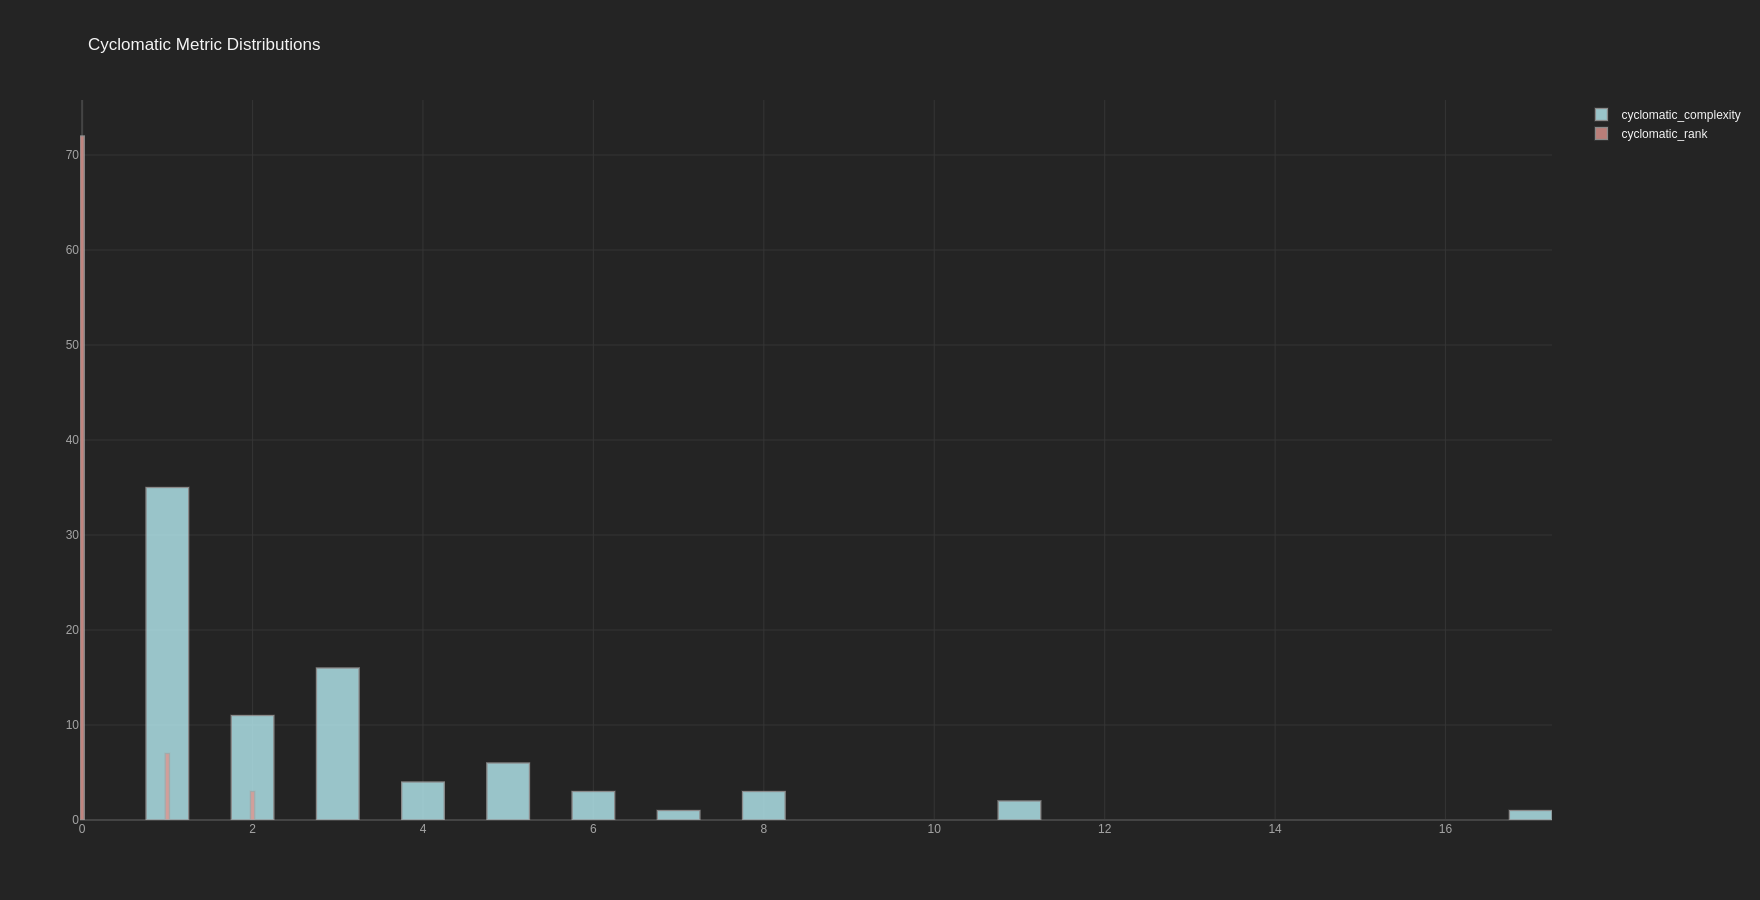

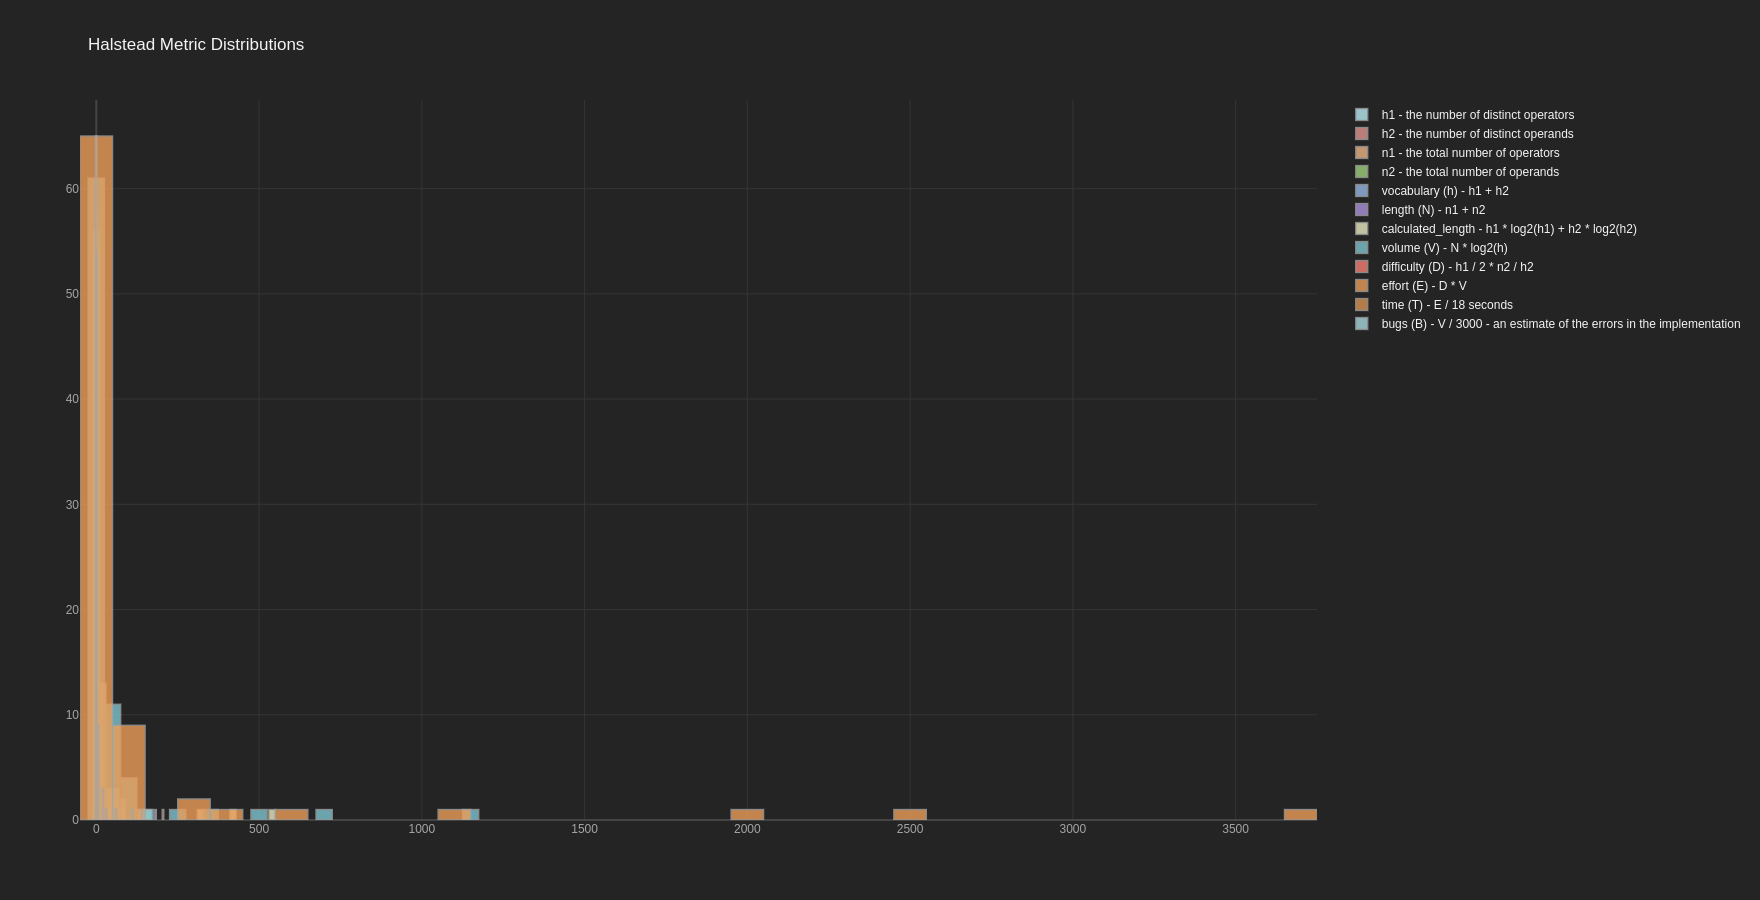

In [3]:
def plot_metrics(repo):
    lut = dict(
        h1='h1 - the number of distinct operators',
        h2='h2 - the number of distinct operands',
        n1='n1 - the total number of operators',
        n2='n2 - the total number of operands',
        vocabulary='vocabulary (h) - h1 + h2',
        length='length (N) - n1 + n2',
        calculated_length='calculated_length - h1 * log2(h1) + h2 * log2(h2)',
        volume='volume (V) - N * log2(h)',
        difficulty='difficulty (D) - h1 / 2 * n2 / h2',
        effort='effort (E) - D * V',
        time='time (T) - E / 18 seconds',
        bugs='bugs (B) - V / 3000 - an estimate of the errors in the implementation',
    )
    
    def remove_test_modules(data):
        mask = data.fullpath.apply(lambda x: not re.search('_test\.py$', x)).astype(bool)
        return data[mask]

    raw = remove_test_modules(repo.raw_metrics)
    mi = remove_test_modules(repo.maintainability_index)
    cc = remove_test_modules(repo.cyclomatic_complexity_metrics)
    hal = remove_test_modules(repo.halstead_metrics)

    raw.iplot(x='fullpath', kind='barh', title='Line Count Metrics', **params)
    mi.iplot(x='fullpath', kind='barh', title='Maintainability Metrics', **params)

    cols = ['cyclomatic_complexity', 'cyclomatic_rank']
    cc[cols].iplot(kind='hist', bins=50, title='Cyclomatic Metric Distributions', **params)
    
    cols = ['h1', 'h2', 'n1', 'n2', 'vocabulary', 'length', 'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs']
    hal[cols]\
        .rename(mapper=lambda x: lut[x], axis=1)\
        .iplot(kind='hist', bins=50, title='Halstead Metric Distributions', **params)

plot_metrics(repo)